In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
df = pd.read_csv('ex1data1.txt',header=None)

In [13]:
df.columns=['A','B']

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='A', ylabel='B'>

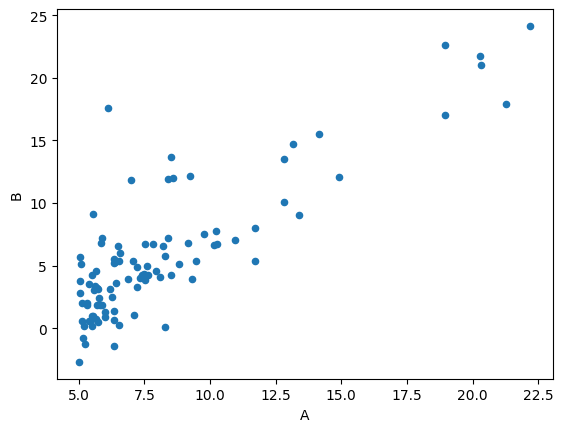

In [19]:
df.plot.scatter('A','B')

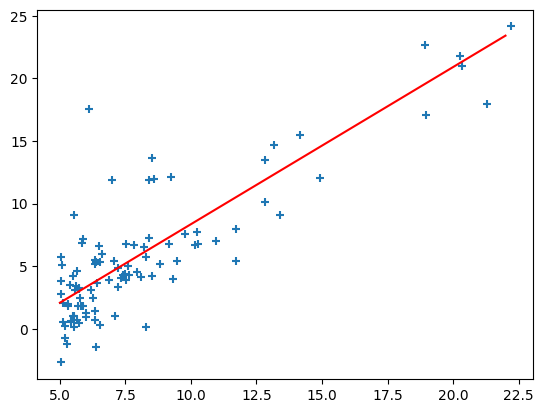

In [119]:
plt.scatter(df['A'],df['B'],marker="+")
plt.plot(x,y,'-r',label="BFL")

In [21]:
df.describe()

,A,B
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [22]:
df.corr()

,A,B
A,1.000000,0.837873
B,0.837873,1.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5944\89310267.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot: >

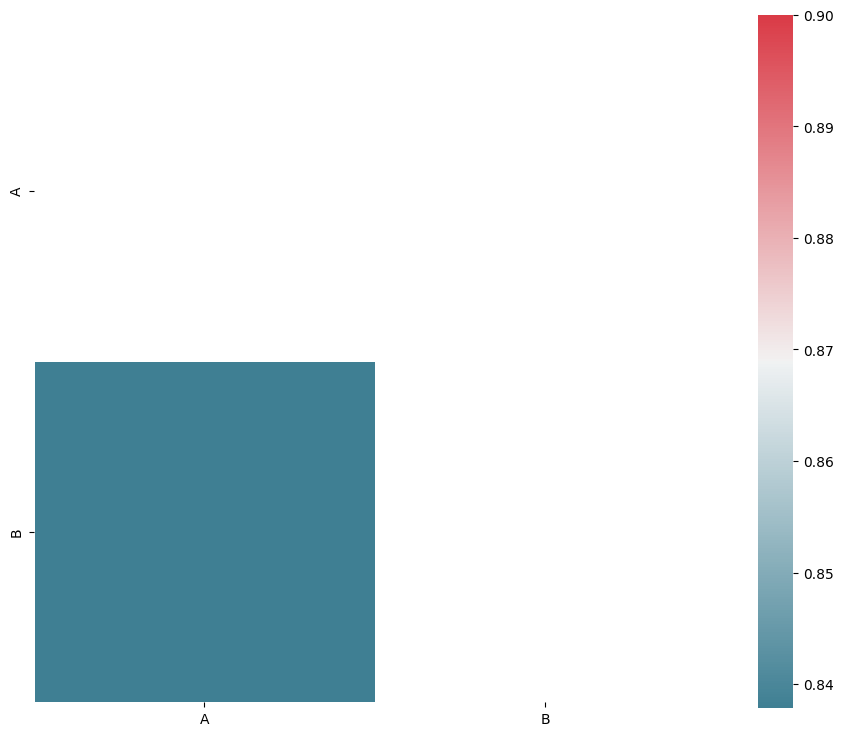

In [27]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

In [48]:
X = df.drop('B',axis=1)
Y = df['B']

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=40)

In [55]:
model = LinearRegression()

In [58]:
model.fit(X_train,Y_train)

LinearRegression()

In [60]:
m = model.coef_
c = model.intercept_
print(f"Slope {m}")
print(f"Intercept {c}")

Slope [1.25444492]
Intercept -4.183220581166233


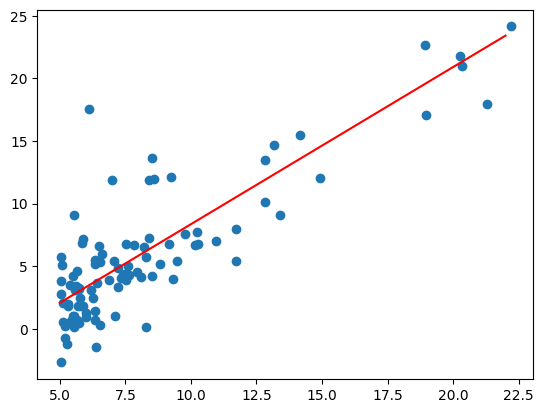

In [120]:
x = np.linspace(5,22)
y = m*x+c
plt.scatter(df['A'],df['B'])
plt.plot(x,y,'-r',label="BFL")

In [62]:
predicted = model.predict(X_test)

In [64]:
r2_score(predicted,Y_test)

0.844021986122665

In [66]:
mean_squared_error(predicted,Y_test)

5.446007986931734

# Second Practical

In [70]:
df2 = pd.read_csv('ex1data2.txt',header=None)

In [73]:
df2.columns = ['Size','bedrooms','price']

In [75]:
df2.describe()

,Size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [76]:
model2 = LinearRegression()

In [77]:
XX = df2.drop('price',axis=1)
YY = df2['price']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(XX,YY,test_size= 0.20,random_state=40)

In [79]:
model.fit(x_train,y_train)

LinearRegression()

In [80]:
print(f"Slope {model.coef_}")
print(f"Inercept {model.intercept_}")

Slope [  141.19485165 -4050.25707931]
Inercept 61672.33727034414


In [81]:
y_pred = model.predict(x_test)

In [82]:
print(f"R square {r2_score(y_pred,y_test)}")
print(f"MSE {mean_squared_error(y_pred,y_test)}")

R square -0.26441524467739197
MSE 7820998160.510213
